<a href="https://colab.research.google.com/github/shnrndk/IP-Cat-Research/blob/main/Model_Developing_First_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from ast import literal_eval

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp  /content/drive/MyDrive/final_dataset_updated.zip /content/

In [ ]:
!unzip  final_dataset_updated.zip

Archive:  final_dataset_updated.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: vpn_final_final.csv     
  inflating: proxy_final_final.csv   


In [ ]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
#df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4 = df4.sample(n = 9200)

df = df.append([df1,df2,df3,df4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

def getgeneralphp(x):
  if (pd.isna(x)):
    return "0"
  else:
    if('PHP' in x):
      return 'PHP'

def changenullaszero(x):
  if (pd.isna(x)): 
    return "0"
  else:
    return "1"

def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

def arrayLiteral(stringarray):
  if(pd.isna(stringarray)):
     return 0
  return len(literal_eval(stringarray))

def removeSquareBrackets(text):
  if(pd.isna(text)):
     return -1
  return literal_eval(text)[0];

def featureImportance(clf):
  importance = clf.feature_importances_
  importancelist = []
  for i,v in enumerate(importance):
    importancelist.append([df.columns[i],v])
  importantdf = pd.DataFrame(importancelist)
  importantdf.columns = ['Feature','Importance']
  ax = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(10,20))

In [ ]:
#df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(getgeneralCloudfront)
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via.0']  = df["data.http.result.response.headers.via.0"].apply(changenullaszero)
df['data.http.result.response.headers.via.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after.0'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location.0'] = df['data.http.result.response.headers.location.0'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.0.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag.0'] = df['data.http.result.response.headers.etag.0'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified.0']  = df['data.http.result.response.headers.last_modified.0'].apply(changenullaszero)
df['data.http.result.response.headers.vary.0'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding.0'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by.0'].fillna(-1, inplace=True)
df['data.http.result.redirect_response_chain.0.headers.server.0'].fillna(-1, inplace=True)
df = df.drop(['data.http.result.redirect_response_chain.0.headers.server.0'],axis=1)
df['data.http.result.response.headers.server.0']  = df['data.http.result.response.headers.server.0'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server.0'].fillna(-1, inplace=True)

In [ ]:
df['data.http.result.response.headers.server.0'] = le.fit_transform(df['data.http.result.response.headers.server.0'].astype(str))
df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
df['data.http.result.response.headers.connection.0'] = le.fit_transform(df['data.http.result.response.headers.connection.0'].astype(str))
df['data.http.result.response.headers.via.0'] = le.fit_transform(df['data.http.result.response.headers.via.0'].astype(str))
df['data.http.result.response.headers.accept_ranges.0'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges.0'].astype(str))
df['data.http.result.response.headers.cache_control.0'] = le.fit_transform(df['data.http.result.response.headers.cache_control.0'].astype(str))
df['data.http.result.response.headers.retry_after.0'] = le.fit_transform(df['data.http.result.response.headers.retry_after.0'].astype(str))
df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
df['data.http.result.response.headers.content_type.0'] = le.fit_transform(df['data.http.result.response.headers.content_type.0'].astype(str))

df['data.http.result.response.headers.location.0'] = le.fit_transform(df['data.http.result.response.headers.location.0'].astype(str))
df['data.http.result.redirect_response_chain.0.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.0.status_line'].astype(str))
df['data.http.result.response.headers.etag.0'] = le.fit_transform(df['data.http.result.response.headers.etag.0'].astype(str))
df['data.http.result.response.headers.last_modified.0'] = le.fit_transform(df['data.http.result.response.headers.last_modified.0'].astype(str))
df['data.http.result.response.headers.vary.0'] = le.fit_transform(df['data.http.result.response.headers.vary.0'].astype(str))
df['data.http.result.response.transfer_encoding.0'] = le.fit_transform(df['data.http.result.response.transfer_encoding.0'].astype(str))

df['data.http.result.response.headers.x_powered_by.0'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by.0'].astype(str))
df['data.http.result.response.headers.pragma.0'] = le.fit_transform(df['data.http.result.response.headers.pragma.0'].astype(str))
df['as_name'] = le.fit_transform(df['as_name'].astype(str))

df['as_no'] = le.fit_transform(df['as_no'].astype(str))
df['vendor'] = le.fit_transform(df['vendor'].astype(str))
vendorEncodings = le.classes_

In [ ]:
#df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(changenullaszero)

In [ ]:
df['netSize']  = df["CIDR"].apply(getCIDRBlockLength)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].apply(removeSquareBrackets)
df['SAN Count']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'].apply(arrayLiteral)

In [ ]:
df['Organization'].fillna(-1, inplace=True)
df['netType'].fillna(-1, inplace=True)
df['No of Who is Records'].fillna(0, inplace=True)
df['Most Recent Update'].fillna(0, inplace=True)

In [ ]:
df['Organization'] = le.fit_transform(df['Organization'].astype(str))
df['netType'] = le.fit_transform(df['netType'].astype(str))

df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].astype(str))
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].astype(str))
df['data.tls.status'] = le.fit_transform(df['data.tls.status'].astype(str))

In [ ]:
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'],axis=1)
df = df.drop(['No Of Owners'],axis=1)
df = df.drop(['CIDR'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)
df = df.drop(['ip'],axis=1)
df = df.drop(['Unnamed: 0_y'],axis=1)

In [ ]:
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'],axis=1)

In [ ]:
#df.corr()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(40,40))
# cor = df.corr()
# sns.heatmap(cor,annot=True)
# plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
vendor_encoded = df['vendor'].values

In [ ]:
df = df.drop(['vendor'],axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df, vendor_encoded)

In [ ]:
fields = df.columns.values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
x_Eval, X_test, y_Eval, y_test = train_test_split(X_test,y_test,test_size = 0.33,random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2543  198  125  109    3]
 [  92 1449   58  101 1301]
 [   6    2 2888   77    0]
 [   3   21   64 2765    3]
 [  59  601  327  105 1950]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.90      2978
           1       0.64      0.48      0.55      3001
           2       0.83      0.97      0.90      2973
           3       0.88      0.97      0.92      2856
           4       0.60      0.64      0.62      3042

    accuracy                           0.78     14850
   macro avg       0.78      0.78      0.78     14850
weighted avg       0.78      0.78      0.77     14850

0.7808080808080808


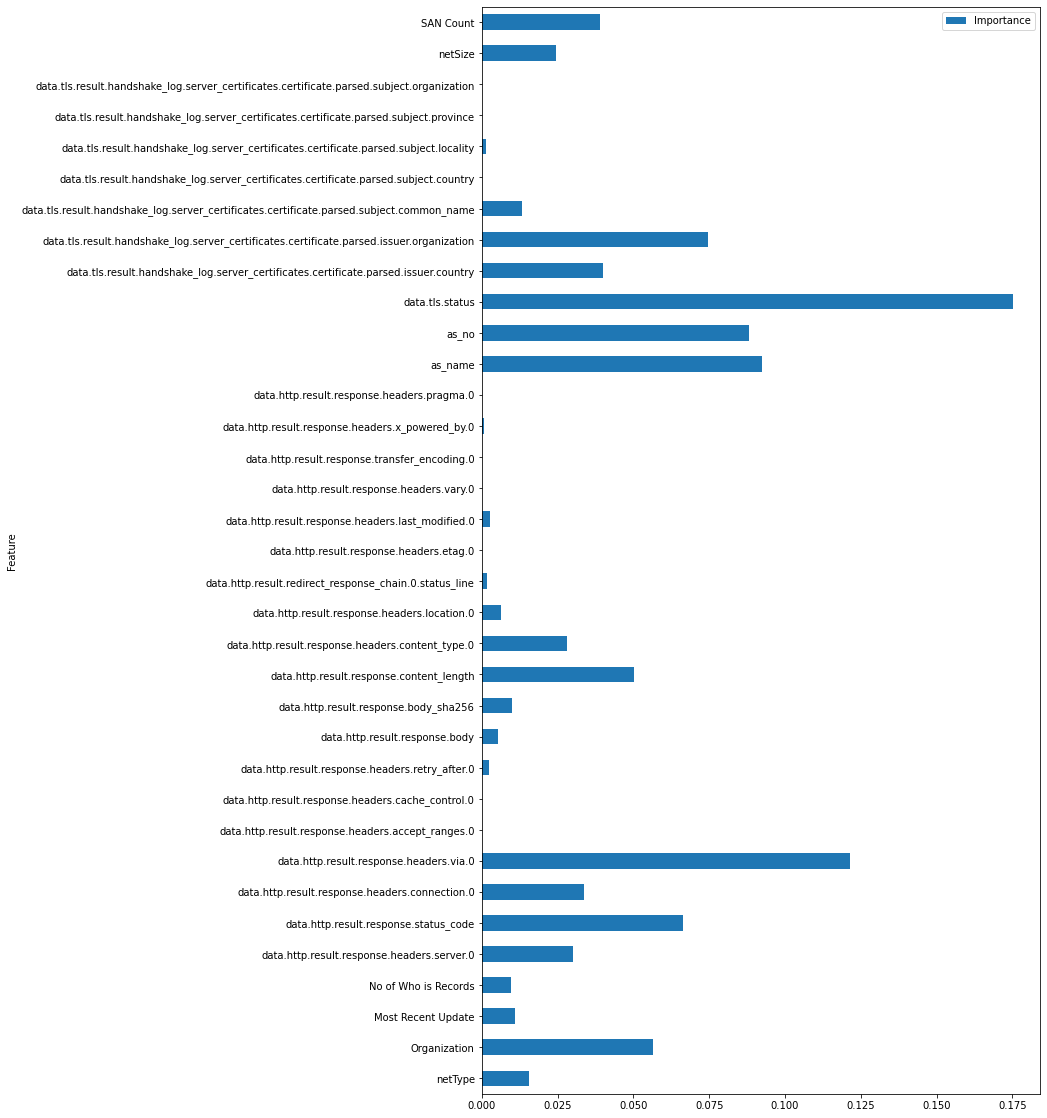

In [ ]:
featureImportance(clf)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))

0.8909090909090909


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2926   33    1    7   11]
 [  87 2464   24   27  399]
 [  19   38 2887   24    5]
 [   5   27   41 2778    5]
 [  34  793   19   21 2175]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2978
           1       0.73      0.82      0.78      3001
           2       0.97      0.97      0.97      2973
           3       0.97      0.97      0.97      2856
           4       0.84      0.71      0.77      3042

    accuracy                           0.89     14850
   macro avg       0.89      0.89      0.89     14850
weighted avg       0.89      0.89      0.89     14850

0.8909090909090909


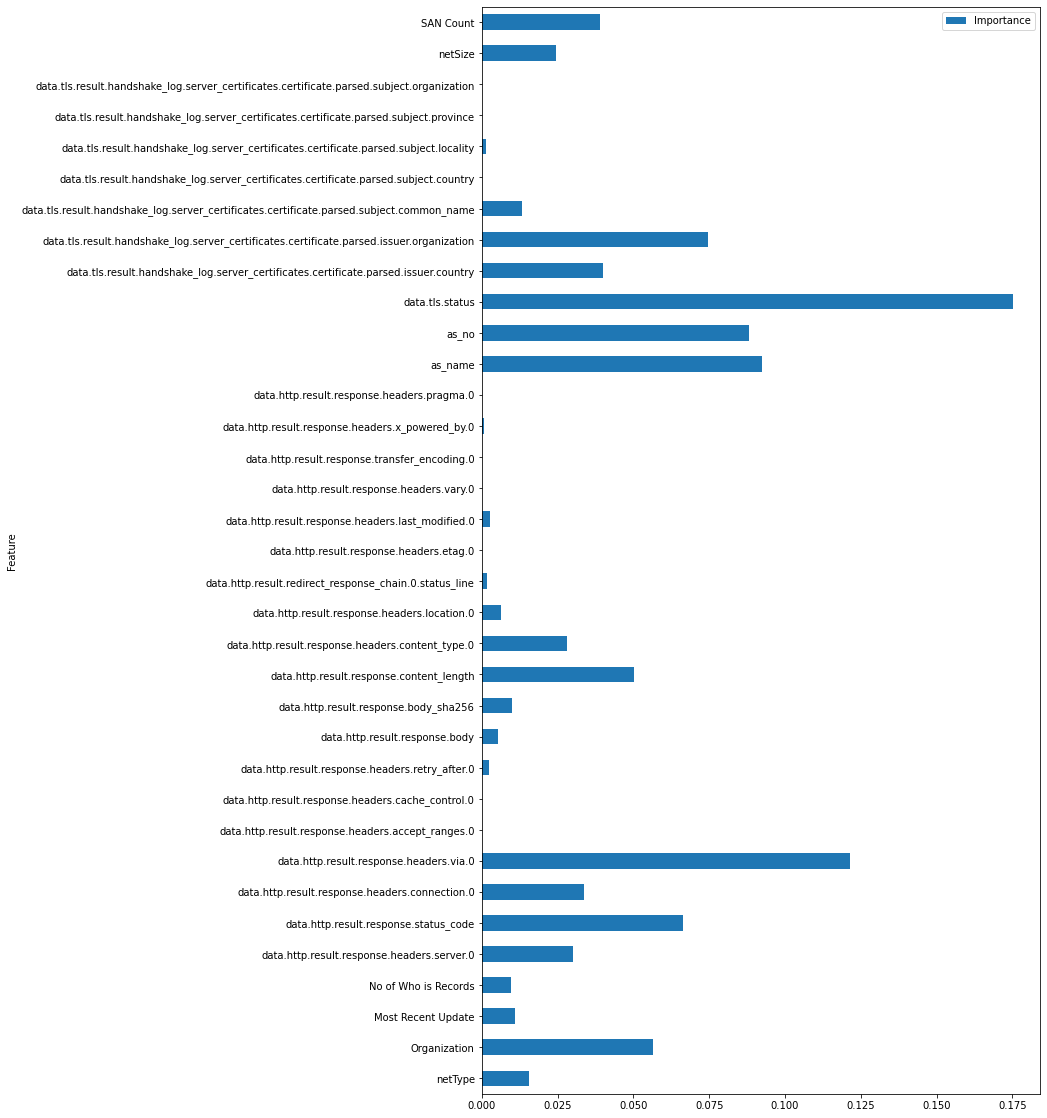

In [ ]:
featureImportance(clf)

In [ ]:
# from sklearn.svm import SVC
# SVM_MODEL = SVC(gamma='auto')
# SVM_MODEL.fit(X_train, y_train)
# y_pred = SVM_MODEL.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))

In [ ]:
# importance = model.feature_importances_

# importancelist = []
# for i,v in enumerate(importance):
#  	importancelist.append([df.columns[i],v])

# importantdf = pd.DataFrame(importancelist)
# importantdf.columns = ['Feature','Importance']
# ax = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(10,20))

In [ ]:
vendorEncodings

array(['cdn', 'cloud', 'hosting', 'proxy', 'vpn'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=123,max_iter=20000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[   1  152 2795   30    0]
 [   0  723 1615   42  621]
 [   0    0 2965    8    0]
 [   0   65 1207 1571   13]
 [   1  263 1676  249  853]]
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      2978
           1       0.60      0.24      0.34      3001
           2       0.29      1.00      0.45      2973
           3       0.83      0.55      0.66      2856
           4       0.57      0.28      0.38      3042

    accuracy                           0.41     14850
   macro avg       0.56      0.41      0.37     14850
weighted avg       0.56      0.41      0.36     14850

0.41164983164983165


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1415   12 1519   30    2]
 [ 648  862 1324  142   25]
 [ 284    0 2680    8    1]
 [ 646   37  592 1581    0]
 [ 577  277 1102  957  129]]
              precision    recall  f1-score   support

           0       0.40      0.48      0.43      2978
           1       0.73      0.29      0.41      3001
           2       0.37      0.90      0.53      2973
           3       0.58      0.55      0.57      2856
           4       0.82      0.04      0.08      3042

    accuracy                           0.45     14850
   macro avg       0.58      0.45      0.40     14850
weighted avg       0.58      0.45      0.40     14850

0.44895622895622894


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=3, random_state=0).fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.9408080808080808


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2973    1    0    1    3]
 [  10 2336    0    5  650]
 [   3    0 2966    1    3]
 [   0   15   10 2822    9]
 [   8  151    2    7 2874]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2978
           1       0.93      0.78      0.85      3001
           2       1.00      1.00      1.00      2973
           3       1.00      0.99      0.99      2856
           4       0.81      0.94      0.87      3042

    accuracy                           0.94     14850
   macro avg       0.95      0.94      0.94     14850
weighted avg       0.94      0.94      0.94     14850

0.9408080808080808


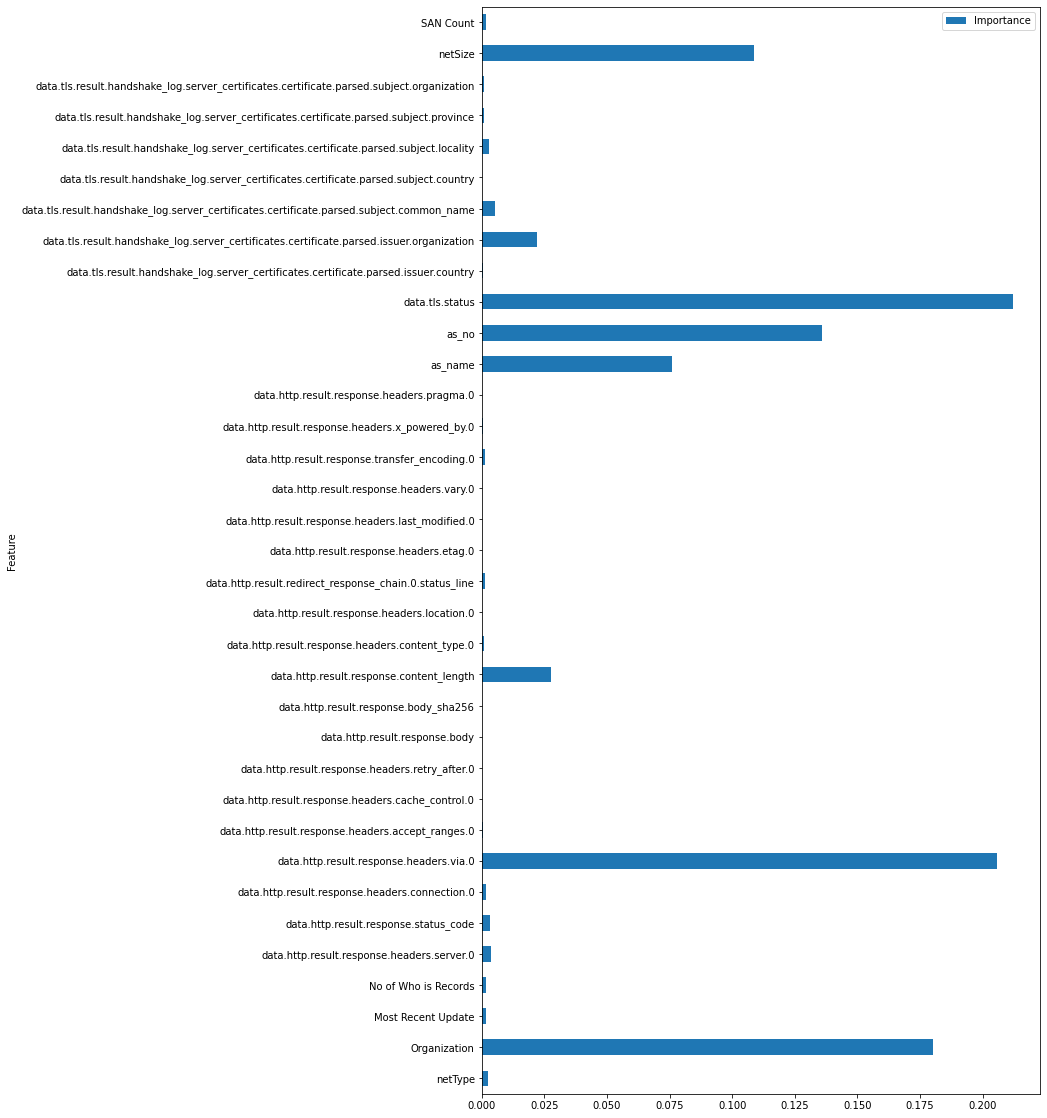

In [ ]:
featureImportance(clf)

In [ ]:
clf.feature_importances_

array([2.44462627e-03, 1.80336887e-01, 1.77404435e-03, 1.60936434e-03,
       3.63653322e-03, 3.17871053e-03, 1.68627216e-03, 2.05633326e-01,
       4.20842756e-04, 8.02739630e-05, 5.87933349e-06, 5.74712215e-06,
       1.90407076e-04, 2.76665923e-02, 9.40173843e-04, 4.70126730e-05,
       1.43363069e-03, 7.70603102e-08, 1.20769121e-05, 2.20875521e-04,
       1.38662394e-03, 2.96154264e-04, 9.64496413e-06, 7.60291902e-02,
       1.35999399e-01, 2.12192036e-01, 6.53594914e-04, 2.22041338e-02,
       5.28809712e-03, 1.24589798e-04, 2.74854011e-03, 6.79657838e-04,
       8.21475760e-04, 1.08656268e-01, 1.58724217e-03])

In [ ]:
# pd.DataFrame({'Feature_Name':fields,'Importance:': clf.feature_importances_}).sort_values('Importance',ascending=False)

pd.DataFrame({"Variable_Name":fields,
              "Importance":clf.feature_importances_}) \
            .sort_values('Importance', ascending=False)

,Variable_Name,Importance
25,data.tls.status,2.121920e-01
7,data.http.result.response.headers.via.0,2.056333e-01
1,Organization,1.803369e-01
24,as_no,1.359994e-01
33,netSize,1.086563e-01
23,as_name,7.602919e-02
13,data.http.result.response.content_length,2.766659e-02
27,data.tls.result.handshake_log.server_certifica...,2.220413e-02
28,data.tls.result.handshake_log.server_certifica...,5.288097e-03
4,data.http.result.response.headers.server.0,3.636533e-03


In [ ]:
len(clf.estimators_)

100

In [ ]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 10), random_state=1,max_iter=100000)

In [ ]:
# clf.fit(X_train, y_train)

In [ ]:
# y_pred = clf.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df))
temp =  pd.DataFrame(scaler.transform(df),columns = fields)

StandardScaler()


In [ ]:
temp
X_train, X_test, y_train, y_test = train_test_split(temp, vendor_encoded, test_size=0.5, random_state=42)